Let's set up the database connection so we can make some quick plots for high level analysis.

In [1]:
import pandas as pd
import psycopg2
from ast import literal_eval

cred = literal_eval(open('dbcred.py', 'r').read())

In [15]:
conn = psycopg2.connect(dbname = 'cava', user = cred['uid'], password = cred['pwd'], host = 'localhost', port = '5432') 

query = "select first_purchase, download_app, purchases, datediff from appdata"

df = pd.read_sql_query(query, conn)

A quick run of descriptive statistics can tell us a lot about the data. We know from the earlier SQL queries that the date range for our date fields are:
                
                 download_app:   2014-11-01 to 2015-01-29    
                 first_purchase: 2014-11-01 to 2015-04-22

This dataset gives us users who downloaded the Cava app over a period of 3 months in the winter, as well as when users first purchased from Cava over a period of 6 months.

A quick preview of what the data looks like in a pandas dataframe:

In [20]:
df.head()

,first_purchase,download_app,purchases,datediff
0,2015-02-05,2015-01-24,7,12
1,2014-12-21,2014-12-03,3,18
2,2014-11-05,2014-11-01,4,4
3,2015-01-01,2014-12-29,1,3
4,2014-12-18,2014-12-15,1,3


Grabbing some quick descriptive statistics about our numerical fields, we can see that the ranges are large for both fields but both skew to the right.

In [18]:
df.describe()

,purchases,datediff
count,3000000.000000,3000000.000000
mean,2.985590,6.513925
std,3.022065,7.000299
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,4.000000,9.000000
max,50.000000,107.000000


Let's make a few quick plots so we can see the skew for ourselves:

In [23]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')


Here's the distribution of purchases in our dataset:

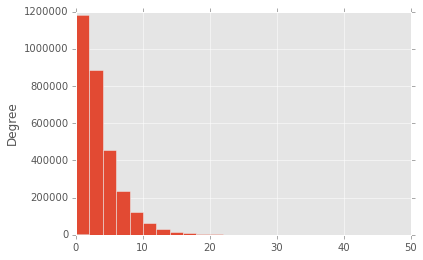

In [32]:
df['purchases'].plot(kind='hist', bins = 25)

Zooming in a little bit:

(-1, 25)

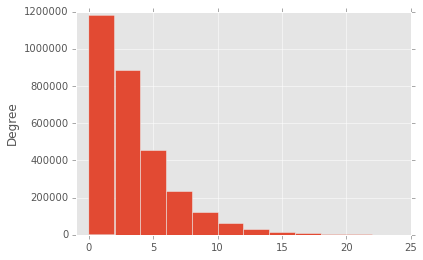

In [36]:
df['purchases'].plot(kind='hist', bins = 25).set_xlim(-1, 25)

And the distribution of the number of days from downloading the Cava app to first purchase:

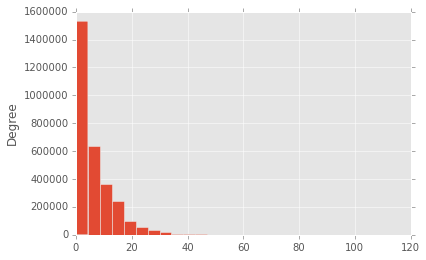

In [35]:
df['datediff'].plot(kind='hist', bins = 25)

Zooming in a little bit:

(-1, 30)

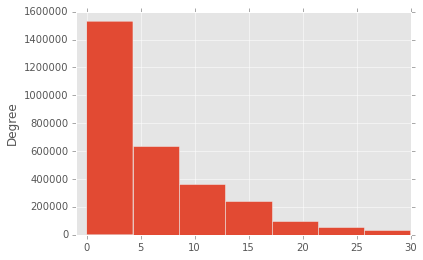

In [34]:
df['datediff'].plot(kind='hist', bins = 25).set_xlim(-1, 30)

Let's make a quick scatterplot of datediff versus purchases to see if there is any insights we can draw:

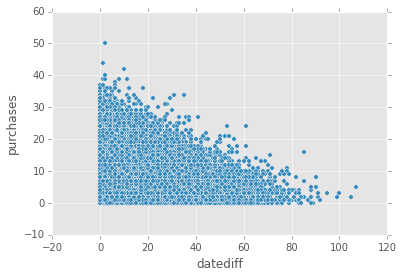

In [27]:
df.plot(x='datediff', y='purchases', kind='scatter')

A simple scatter plot can tell us a lot about the data. On the surface, this plot indicates that the sooner a consumer purchases from Cava after downloading the app, the more purchases they make at Cava in the future. This can be an exciting plot to make insights off of but caution is warranted. It is possible that people who already go to Cava a lot were more likely to download and use the app anyways. Also, given a longer date range, we may also find that consumers who were slower to go to Cava after downloading the app frequent Cava more as time goes on.

There are several things we don't know from this dataset that would be interesting next steps:
  1. Which store location users went first purchased from
  2. Breaking out the purchases column in to a purchase level table to add to consumer level data.
  3. How much was spent at each purchase
  4. The dietary preferences selected by the user upon setting up the Cava app.
  5. How the data differs in other times of the year, this dataset covers mostly the colder months of D.C.